In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [185]:
df_master = pd.read_csv('ECE 143.csv')

if 'average_sales' not in df_master:
    df_master.insert(5, 'average_sales', df_master.iloc[:,1:5].mean(axis=1).to_frame())
    df_master['average_sales'] = df_master['average_sales'].astype(int)
# print(df_master.head())

# Adjust columns names
df_master.rename(columns={"Avg/C": "Average temperature(Celsius)",
                   "Median Household Income\t $": "Median Household Income", 
                   "% Libertarian/ Independent Representation": "% Libertarian/Independent Representation",
                   "% High school graduate\nor higher": "% High school graduate or higher",
                   "% Bachelor's degree\nor higher": "% Bachelor's degree or higher",
                   "Avg gasoline price per gallon": "Average gasoline price per gallon",
                   "COMMUTE TIME": "Commute time",
                   "PUBLIC TRANSIT USAGE": "Public transit usage",
                   "ROAD QUALITY": "Road quality",
                   "BRIDGE QUALITY": "Bridge quality",
                   "EV Sales\n2015": "EV Sales 2015",
                   "EV Sales\n2016": "EV Sales 2016",
                   "EV Sales\n2017": "EV Sales 2017",
                   "EV Sales\n2018": "EV Sales 2018",                   
                   "EV Sales\n2015 % of Total": "EV Sales 2015 % of Total",
                   "EV Sales\n2016 % of Total": "EV Sales 2016 % of Total",
                   "EV Sales\n2017 % of Total": "EV Sales 2017 % of Total",
                   "EV Sales\n2018 % of Total": "EV Sales 2018 % of Total",                             
                   "2015 EV\nMarket Share\nW/in State": "2015 EV market share within state",              
                   "2016 EV\nMarket Share\nW/in State": "2016 EV market share within state",                   
                   "2017 EV\nMarket Share\nW/in State": "2017 EV market share within state",
                   "2018 EV\nMarket Share\nW/in State": "2018 EV market share within state"
                   }, inplace=True)

stateDict = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'District of Columbia': 'DC',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}
df_master['StateAbbreviation'] = df_master['State'].map(stateDict)
df_master.set_index(["State"], inplace=True)
df_master = df_master.drop("California") 
df_master = df_master.drop("District of Columbia")
df = df_master.iloc[:,13:33].copy()
# print(df)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, Alabama to Wyoming
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Avg/F                                      49 non-null     float64
 1   Average temperature(Celsius)               49 non-null     float64
 2   Commute time                               49 non-null     float64
 3   Public transit usage                       49 non-null     float64
 4   Road quality                               49 non-null     float64
 5   Bridge quality                             49 non-null     float64
 6   Average retail price (cents/kWh)           49 non-null     float64
 7   Average gasoline price per gallon          49 non-null     float64
 8   % High school graduate or higher           49 non-null     float64
 9   % Bachelor's degree or higher              49 non-null     float64
 10  Advanced degree       

In [187]:
df.describe()

,Avg/F,Average temperature(Celsius),Commute time,Public transit usage,Road quality,Bridge quality,Average retail price (cents/kWh),Average gasoline price per gallon,% High school graduate or higher,% Bachelor's degree or higher,Advanced degree,Democratic Representation,Republican Representation,% Green Representation,% Libertarian/Independent Representation,Median Household Income,Electric Vehicle Tax Credit Program (1/0),Charging Locations,Charging Outlets,Outlets Per Location
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,51.791837,10.989796,24.938776,25.836735,25.040816,25.632653,11.122857,2.857959,0.889959,0.300633,0.112429,0.433327,0.495592,0.009720,0.036449,69071.571429,0.367347,328.714286,859.714286,2.557143
std,8.729377,4.843219,14.376497,14.530639,14.358446,14.697922,4.048085,0.247857,0.027952,0.050960,0.027277,0.100062,0.100923,0.006962,0.016016,11387.500071,0.487078,307.362774,821.476846,0.485532
min,26.600000,-3.000000,1.000000,1.000000,1.000000,1.000000,7.710000,2.540000,0.828000,0.199000,0.078000,0.216000,0.294000,0.000000,0.000000,44787.000000,0.000000,16.000000,26.000000,1.530000
25%,45.200000,7.300000,13.000000,14.000000,13.000000,13.000000,8.850000,2.700000,0.865000,0.269000,0.093000,0.359000,0.419000,0.006200,0.028000,60597.000000,0.000000,85.000000,212.000000,2.340000
50%,50.700000,10.400000,25.000000,26.000000,25.000000,26.000000,9.810000,2.820000,0.898000,0.290000,0.107000,0.456000,0.490000,0.009800,0.035000,67444.000000,0.000000,234.000000,550.000000,2.570000
75%,57.600000,14.200000,36.000000,38.000000,37.000000,38.000000,10.660000,2.940000,0.914000,0.330000,0.127000,0.498000,0.579000,0.013800,0.047000,74399.000000,1.000000,454.000000,1255.000000,2.720000
max,70.700000,21.500000,50.000000,50.000000,50.000000,50.000000,28.720000,3.780000,0.930000,0.421000,0.187000,0.610000,0.686000,0.029100,0.093000,95572.000000,1.000000,1190.000000,3109.000000,4.220000


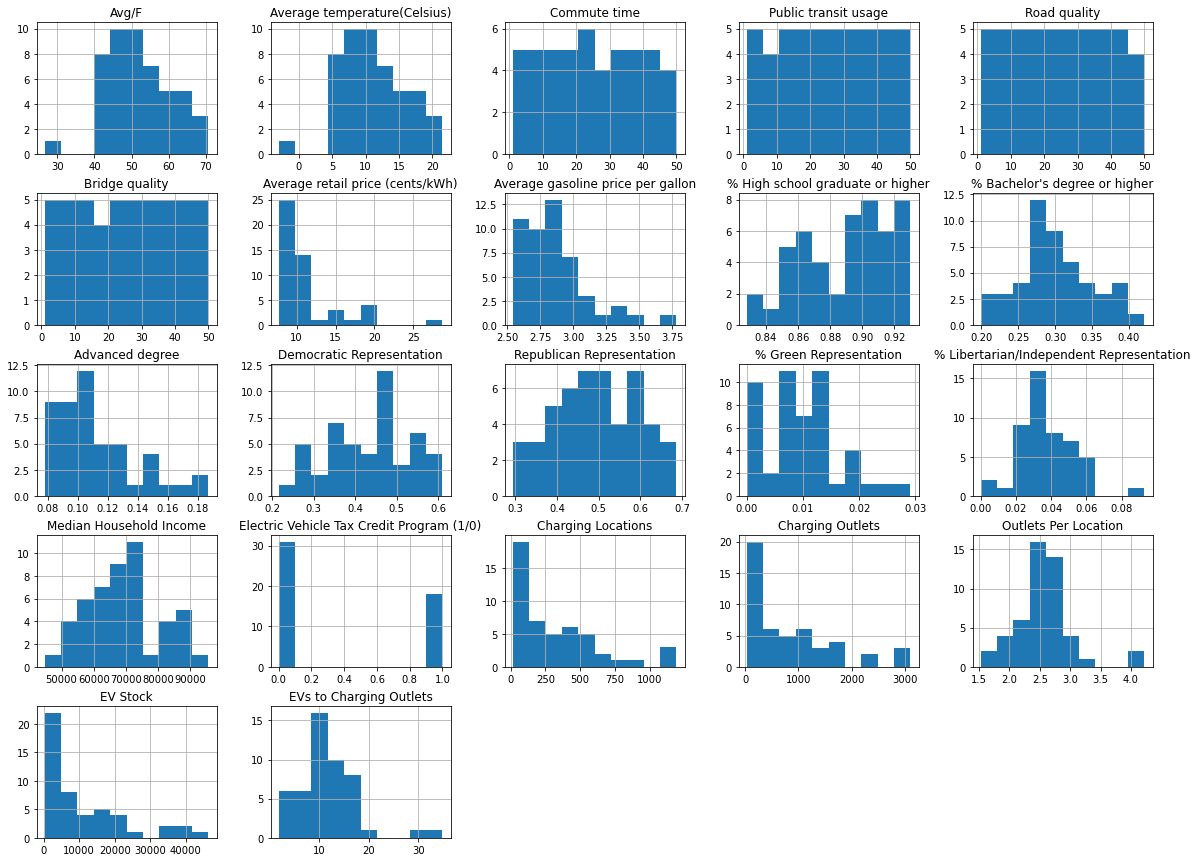

In [160]:
# %matplotlib inline 
import matplotlib.pyplot as plt 
df.hist(figsize=(20,15))
plt.show()

# Explain below plots
* For some reason the x-axis labels are not being displayed. See the code for name of the feature being plot
* The size of the markers are # of charging locations
* Color map corresponds to average sales data, from low (blue) to high (red)

Text(0.5, 0, "% Bachelor's degree or higher")

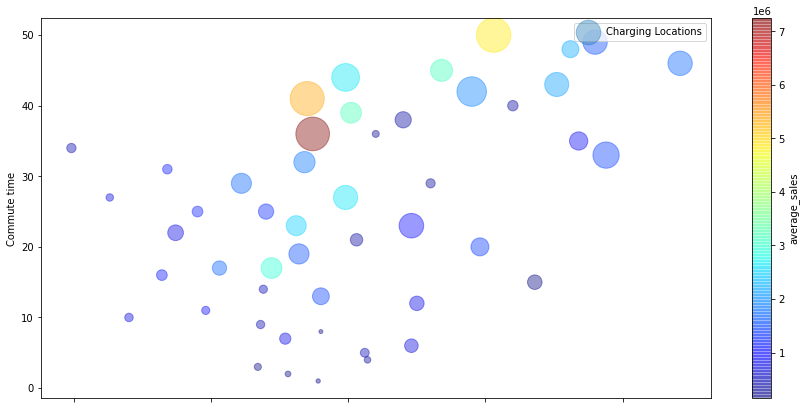

In [180]:
ax = df_master.plot(kind="scatter", x="% Bachelor's degree or higher", y="Commute time", alpha=0.4,
              s=df_master["Charging Locations"], label="Charging Locations", figsize=(15,7), 
              c="average_sales", cmap=plt.get_cmap("jet"), colorbar=True)
ax.set_xlabel("% Bachelor's degree or higher")
# for i, txt in enumerate(df_master["StateAbbreviation"]):
#     ax.annotate(txt, (df_master["% Bachelor's degree or higher"][i], df_master["Commute time"][i]), ha='center', va='center')

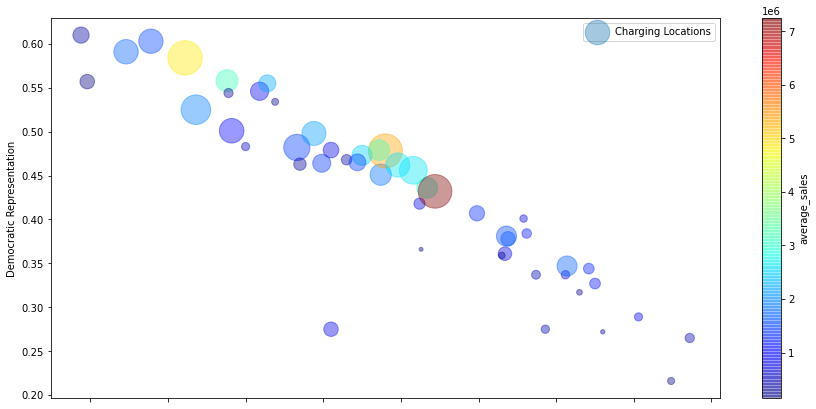

In [177]:
ax = df_master.plot(kind="scatter", x="Republican Representation", y="Democratic Representation", alpha=0.4,
              s=df_master["Charging Locations"], label="Charging Locations", figsize=(15,7), 
              c="average_sales", cmap=plt.get_cmap("jet"), colorbar=True)

# for i, txt in enumerate(df_master["StateAbbreviation"]):
#     ax.annotate(txt, (df_master["Republican Representation"][i], df_master["Democratic Representation"][i]), ha='center', va='center')

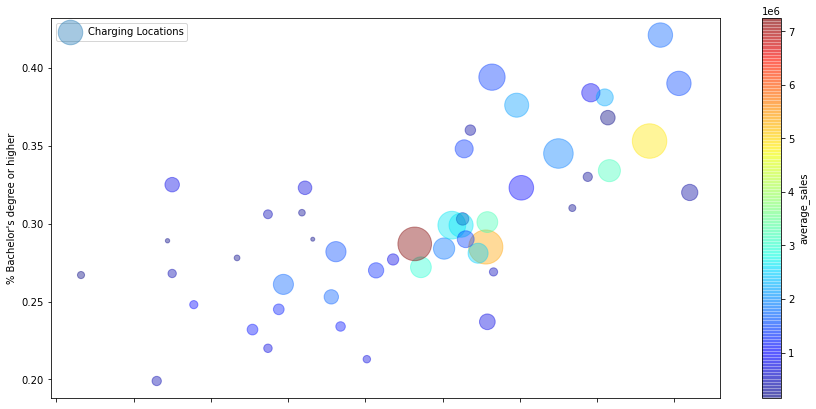

In [179]:
ax = df_master.plot(kind="scatter",x="Democratic Representation", y="% Bachelor's degree or higher", alpha=0.4,
              s=df_master["Charging Locations"], label="Charging Locations", figsize=(15,7), 
              c="average_sales", cmap=plt.get_cmap("jet"), colorbar=True)
# for i, txt in enumerate(df_master["StateAbbreviation"]):
#     ax.annotate(txt, (df_master["Democratic Representation"][i], df_master["% Bachelor's degree or higher"][i]), ha='center', va='center')

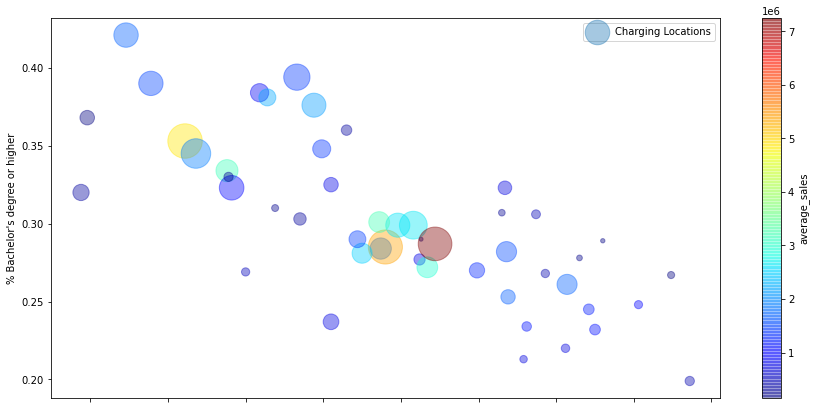

In [172]:
ax = df_master.plot(kind="scatter",x="Republican Representation", y="% Bachelor's degree or higher", alpha=0.4,
              s=df_master["Charging Locations"], label="Charging Locations", figsize=(15,7), 
              c="average_sales", cmap=plt.get_cmap("jet"), colorbar=True)

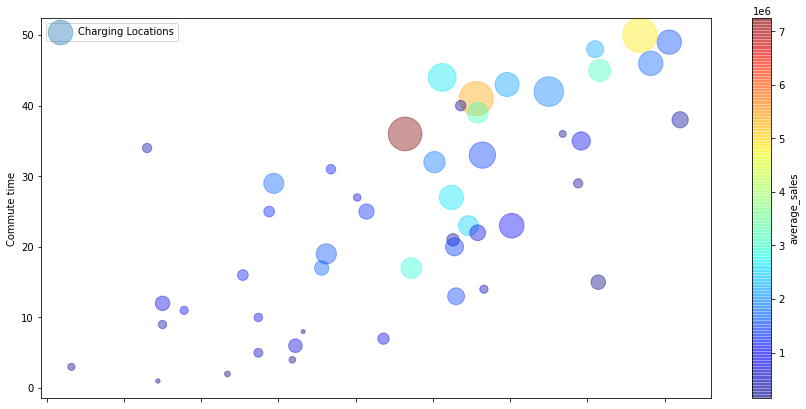

In [171]:
ax = df_master.plot(kind="scatter", x="Democratic Representation", y="Commute time", alpha=0.4,
              s=df_master["Charging Locations"], label="Charging Locations", figsize=(15,7), 
              c="average_sales", cmap=plt.get_cmap("jet"), colorbar=True)

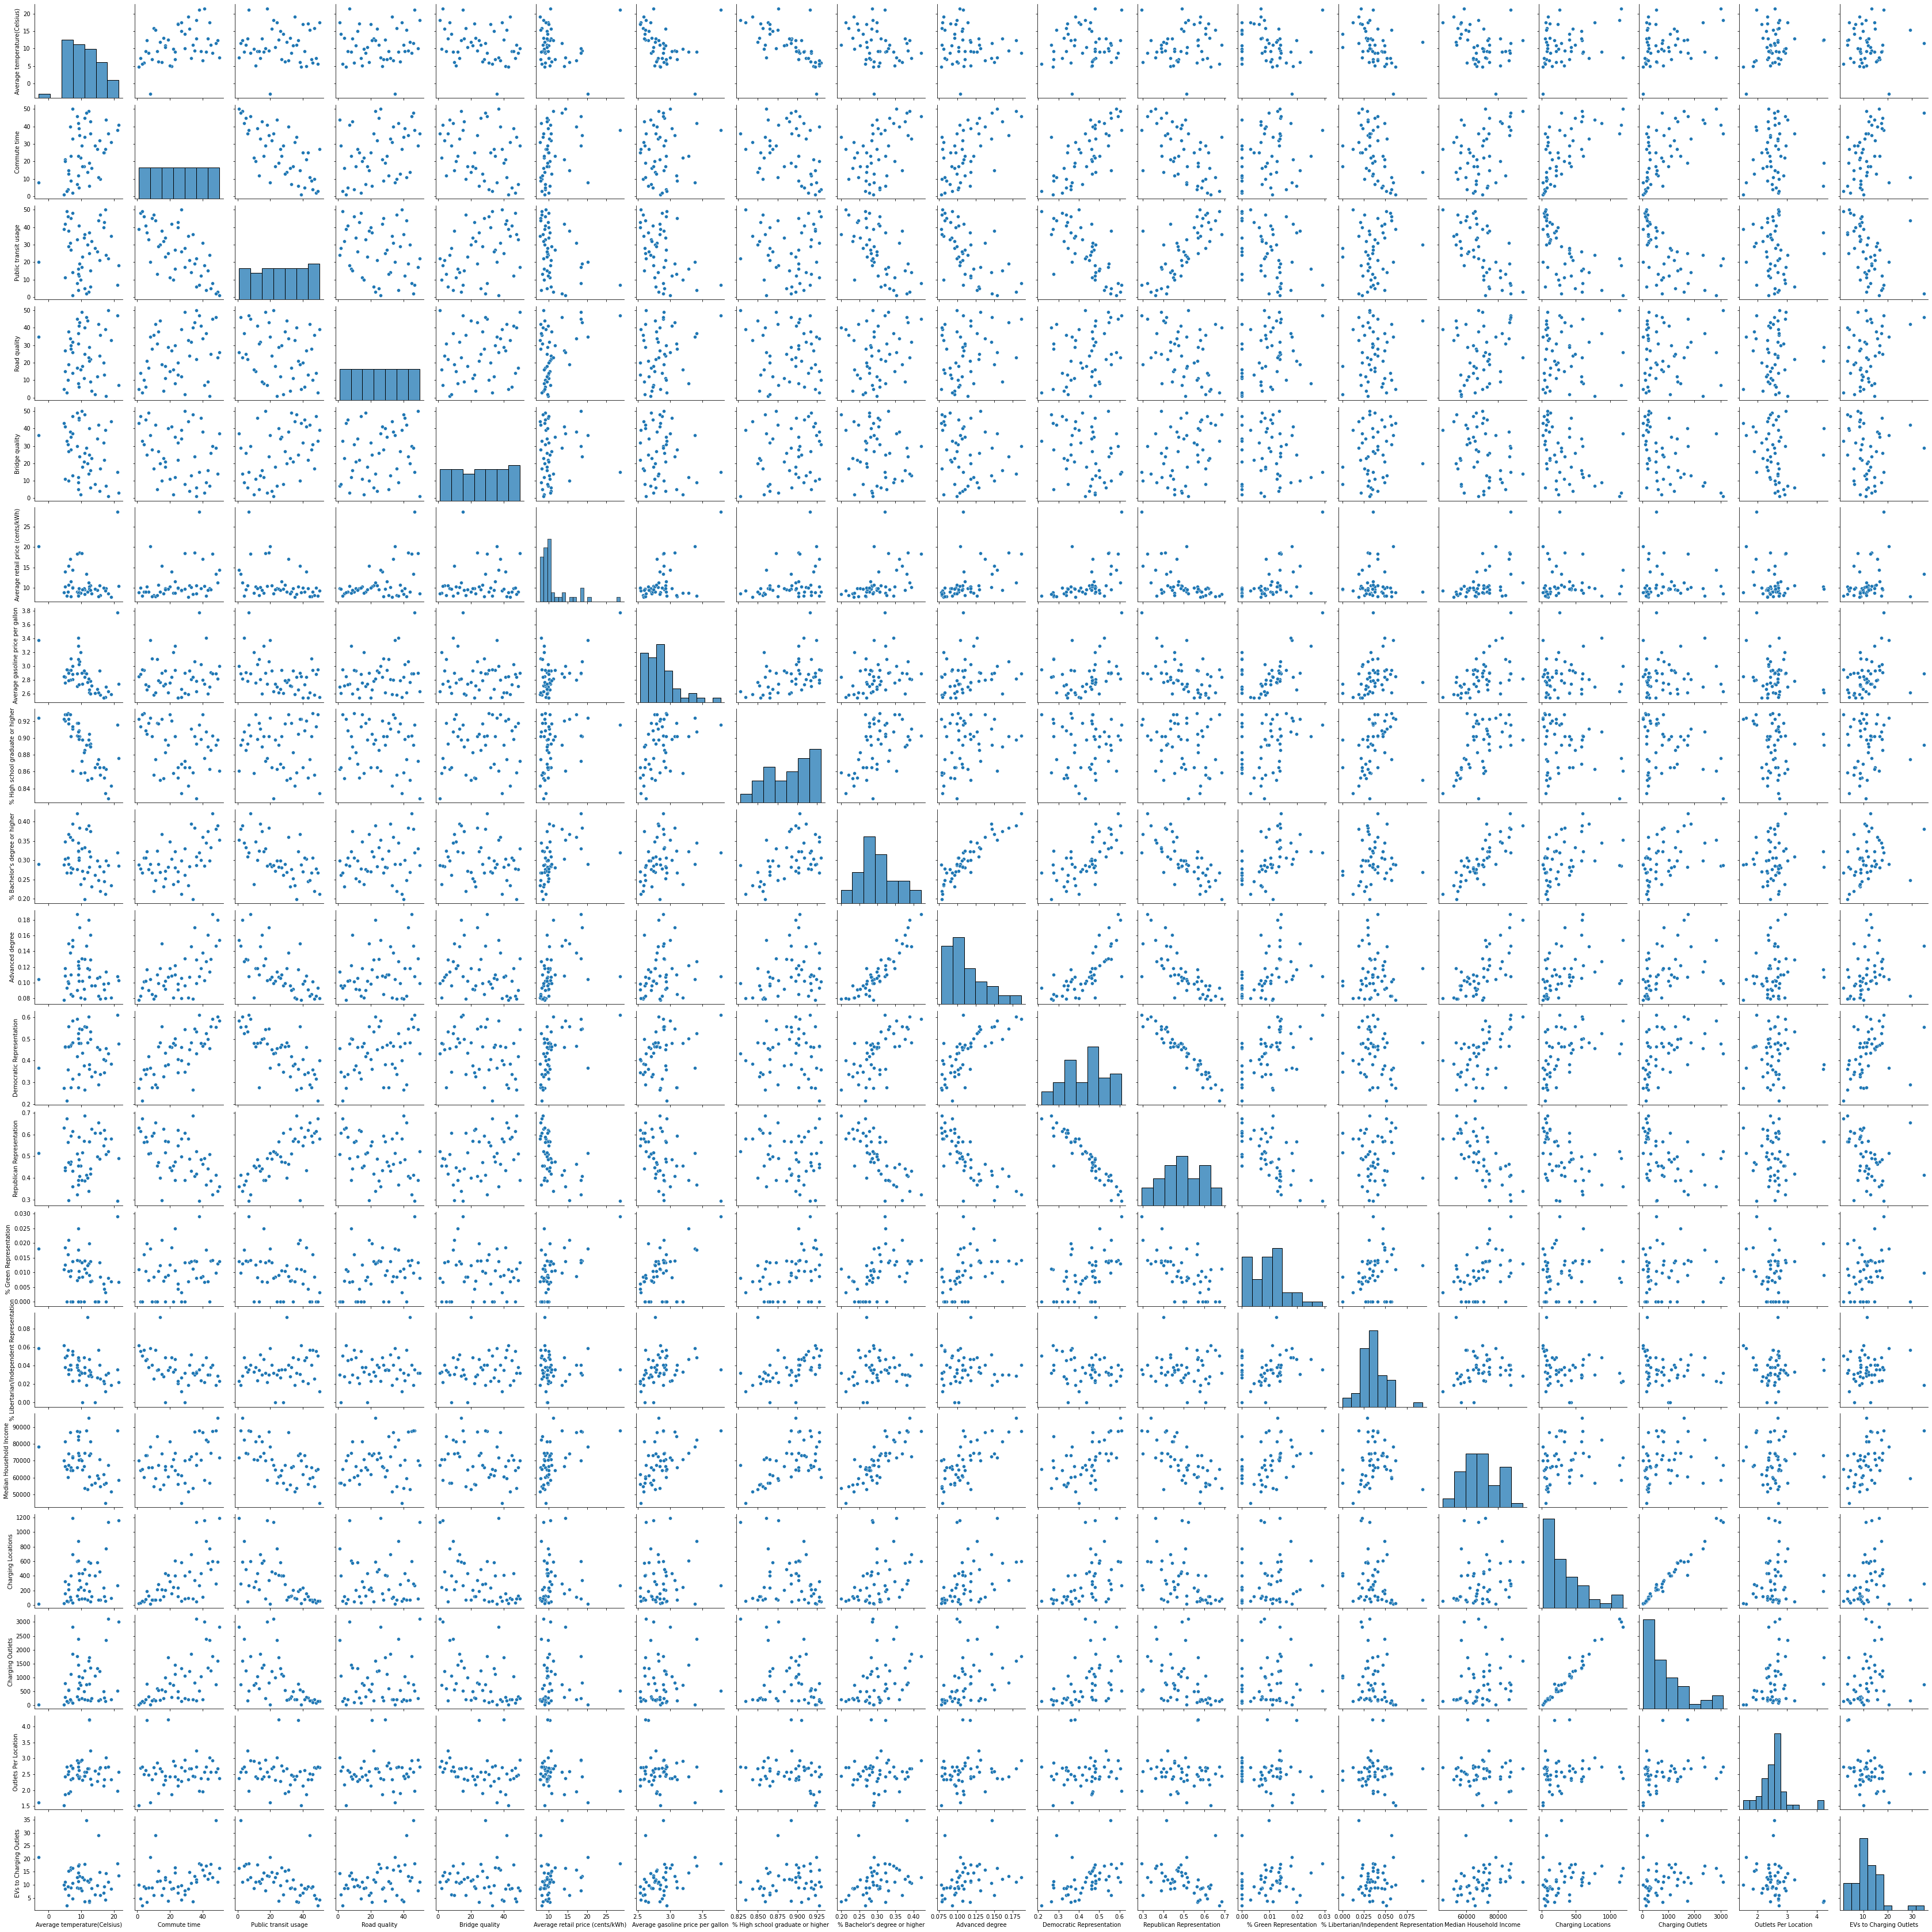

In [162]:
numericalSubset = ['Average temperature(Celsius)', 'Commute time','Public transit usage','Road quality','Bridge quality','Average retail price (cents/kWh)','Average gasoline price per gallon',
             '% High school graduate or higher',"% Bachelor's degree or higher",'Advanced degree','Democratic Representation','Republican Representation',
             '% Green Representation','% Libertarian/Independent Representation','Median Household Income','Charging Locations',
             'Charging Outlets','Outlets Per Location','EVs to Charging Outlets']
subset = df_master[numericalSubset]
sns.pairplot(subset,vars = numericalSubset,diag_kind='hist')